<a href="https://colab.research.google.com/github/shrisha337-beep/Library-Slip-Tracker/blob/main/Library_slip_tracker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 0: Installing Dependencies

In [19]:
!pip install pandas numpy matplotlib seaborn scikit-learn

Step 1: Installing Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, datetime
import random
from sklearn.preprocessing import LabelEncoder, StandardScaler # Corrected import
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # Corrected import
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Step 2: Generate Synthetic DataSet (500 entries)

In [21]:
#SetUp
np.random.seed(42)
student = ['Raghav Singh','Rahul Sharma','Anjali Khanna','Khushi Mukhija','Shreeja Chaturvedi','Megha Jain','Kunal Mehta','Ananya Shroff','Karan Ahuja','Sneha Kapoor',
                 'Rohit Kashyap','Megha Jain','Vivek Agrawal','Isha Khanna','Aman Verma','Priya Desai','Shreya Sharma']
books = ['Introduction to ML','Python Basics','Data Science with Python','Modern Web-Dev','Operating Systems','Linear Algebra','Digital Circutis',
                'Database Systems','Advanced Machine Learning','Artificial Intelligence','Electronic Circuits']
departments = ['CS','Math','Electronics','AI','Web Dev']
librarians = ['Mrs. Batra','Mr. Khurana','Ms. Sheikh','Mrs. Kapoor','Mr. Ahuja']

#Settings
n = 500
fine_per_day = 1
start_date = datetime(2025,1,1)

#17 offsets from -2 to 14
return_offsets = list(range(-2,15))
#17 probabilities matching above
probabilities = np.array([0.03, 0.03, 0.06, 0.06, 0.06, 0.06, 0.06,
                          0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,
                          0.05, 0.05, 0.05])
#Normalize to sum to 1.0
probabilities = probabilities/probabilities.sum()

#Generate Data
data = []
for i in range(n):
    slip_id = f"SLIP{i+1:05d}"
    student = random.choice(student)
    book = random.choice(books)
    department = random.choice(departments)
    librarian = random.choice(librarians)

    issue_date = start_date + timedelta(days=random.randint(0,365))
    due_date = issue_date + timedelta(days=14) # Due date should be relative to issue date
    return_offset = random.choices(return_offsets, weights=probabilities, k=1)[0]
    return_date = due_date + timedelta(days=int(return_offset)) # Calculate return_date relative to due_date

    delay_days = max(0,(return_date - due_date).days)
    fine_amount = delay_days * fine_per_day

    data.append([slip_id, student, book, department, librarian, issue_date, due_date, return_date, delay_days, fine_amount])

# Create and Save Dataframe
columns = ['Slip_Id','Student','Book','Department','Librarian','Issue_Date','Due_Date','Return_Date','Delay_Days','Fine']
df = pd.DataFrame(data,columns=columns)
df.to_csv('library_slip_tracker.csv',index=False)
print("Synthetic dataset generated and saved as 'library_slip_tracker.csv")

Synthetic dataset generated and saved as 'library_slip_tracker.csv


Step 3: Loading DataSet (either uploaded by user or use the generated one)

In [22]:
from google.colab import files
import io
import pandas as pd

print("Please upload your own dataset or press cancel to use generated one")
uploaded = files.upload()
if uploaded:
  for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
  print("No file uploaded, using generated DataSet:")
  # Read the generated CSV directly from the file system
  df = pd.read_csv('library_slip_tracker.csv')

Please upload your own dataset or press cancel to use generated one


No file uploaded, using generated DataSet:


Step 4: EDA (Exploratory Data Analysis)

Shape of the data: (500, 10)

First 5 rows:
      Slip_Id     Student                Book   Department    Librarian  \
0  SLIP00001  Aman Verma    Digital Circutis  Electronics   Mrs. Batra   
1  SLIP00002           r    Database Systems           AI  Mrs. Kapoor   
2  SLIP00003           r  Introduction to ML           CS  Mrs. Kapoor   
3  SLIP00004           r      Linear Algebra      Web Dev   Ms. Sheikh   
4  SLIP00005           r      Linear Algebra      Web Dev   Mrs. Batra   

   Issue_Date    Due_Date Return_Date  Delay_Days  Fine  
0  2025-04-01  2025-04-15  2025-04-29          14    14  
1  2025-08-31  2025-09-14  2025-09-17           3     3  
2  2025-08-24  2025-09-07  2025-09-18          11    11  
3  2025-12-09  2025-12-23  2025-12-24           1     1  
4  2025-10-17  2025-10-31  2025-11-01           1     1  

Data Types:
 Slip_Id        object
Student        object
Book           object
Department     object
Librarian      object
Issue_Date     object
Due_Date       o

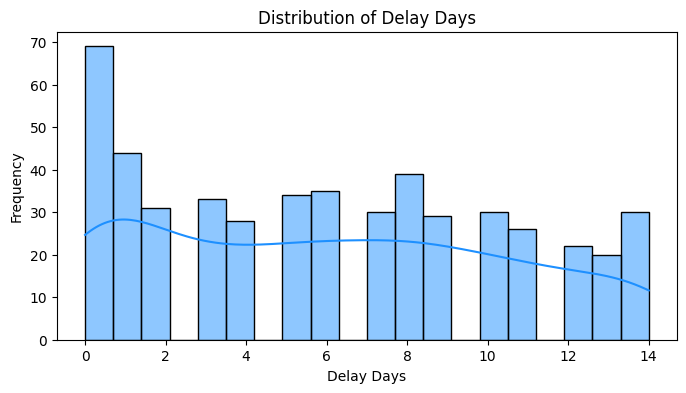

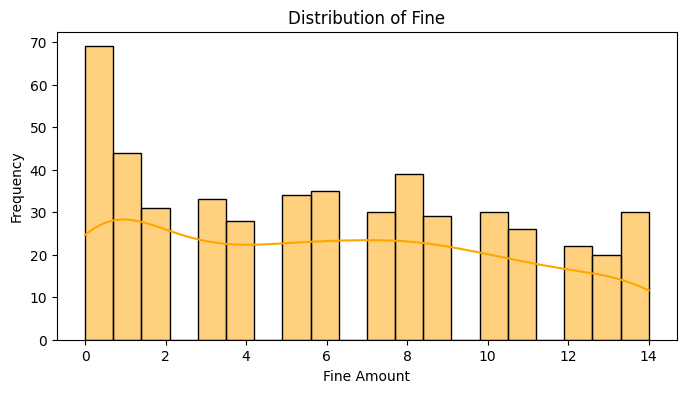

/tmp/ipython-input-4091869484.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delayed_books.values, y=delayed_books.index, palette='mako')


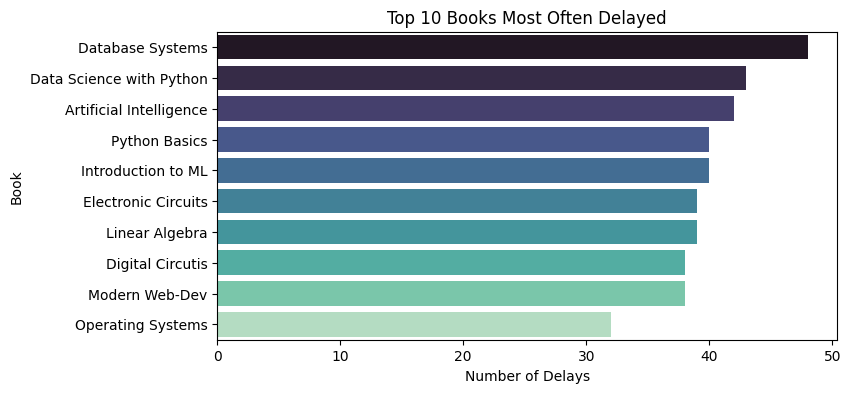

/tmp/ipython-input-4091869484.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Department', y='Delay_Days', data=df, palette='Set3')


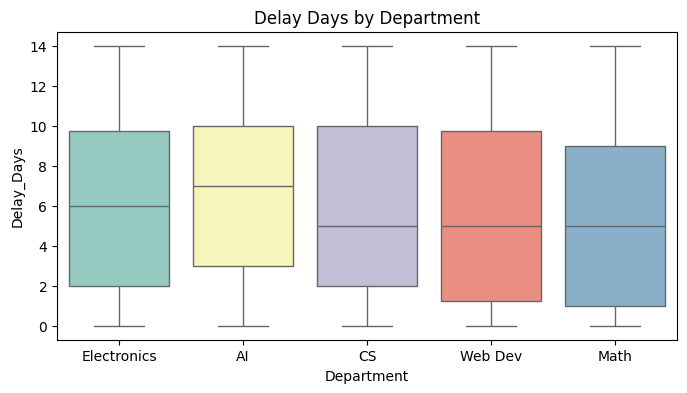

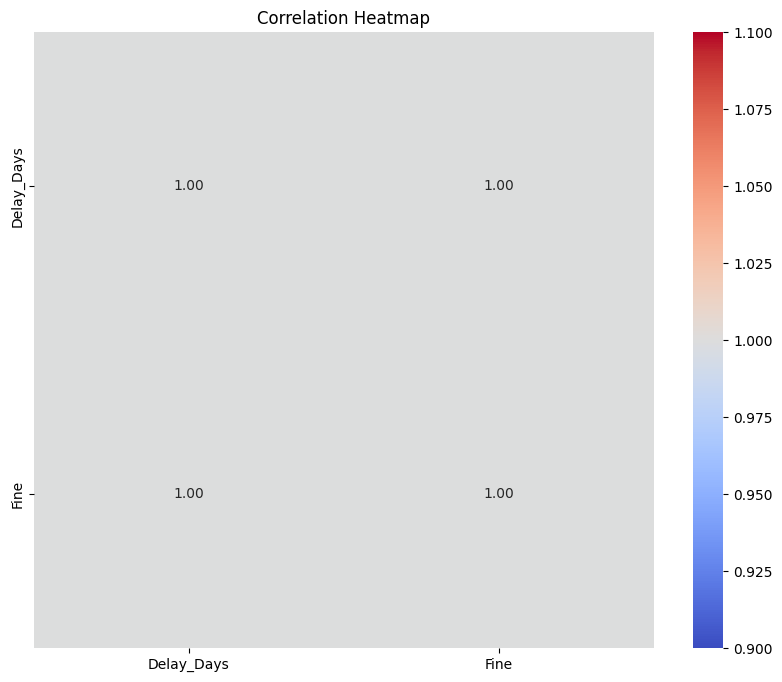

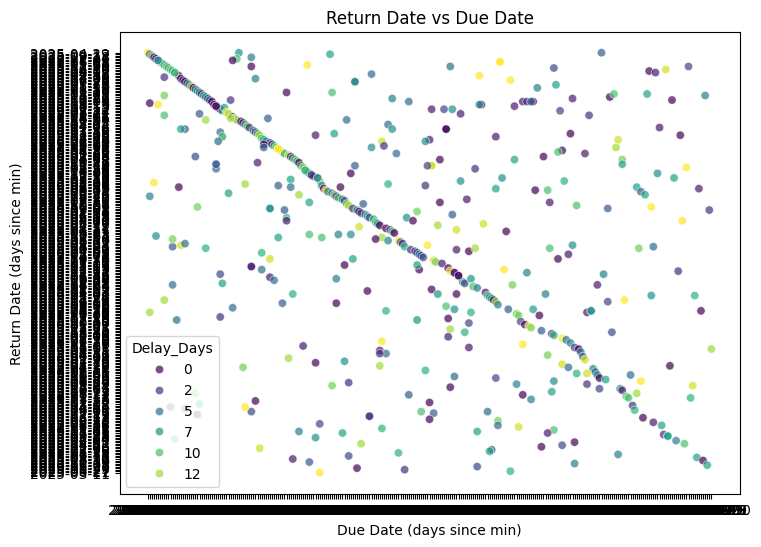

/tmp/ipython-input-4091869484.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Librarian', y='Delay_Days', data=df, estimator='mean', palette='pastel')


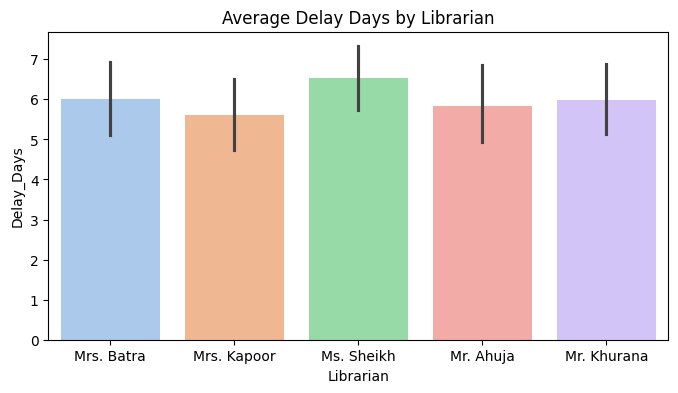


EDA completed. Insights can be used to inform feature engineering and modeling.


In [23]:
# 1. Basic Information
print("Shape of the data:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values per Column:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe(include='all'))

# 2. Value Counts for Categorical Columns
categorical_cols = ['Student', 'Book', 'Department', 'Librarian']
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n", df[col].value_counts())

# 3. Distribution of Delay_Days
plt.figure(figsize=(8,4))
sns.histplot(df['Delay_Days'], bins=20, kde=True, color='dodgerblue')
plt.title('Distribution of Delay Days')
plt.xlabel('Delay Days')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of Fine
plt.figure(figsize=(8,4))
sns.histplot(df['Fine'], bins=20, kde=True, color='orange')
plt.title('Distribution of Fine')
plt.xlabel('Fine Amount')
plt.ylabel('Frequency')
plt.show()

# 5. Books Most Often Delayed
delayed_books = df[df['Delay_Days']>0]['Book'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=delayed_books.values, y=delayed_books.index, palette='mako')
plt.title('Top 10 Books Most Often Delayed')
plt.xlabel('Number of Delays')
plt.ylabel('Book')
plt.show()

# 6. Delay by Department
plt.figure(figsize=(8,4))
sns.boxplot(x='Department', y='Delay_Days', data=df, palette='Set3')
plt.title('Delay Days by Department')
plt.show()

# 7. Correlation Heatmap (numerical features)
plt.figure(figsize=(10,8))
numerical_cols = df.select_dtypes(include=['number']).columns
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 8. Return Date vs Due Date (scatter plot)
plt.figure(figsize=(8,6))
sns.scatterplot(x='Due_Date', y='Return_Date', data=df, hue='Delay_Days', palette='viridis', alpha=0.7)
plt.title('Return Date vs Due Date')
plt.xlabel('Due Date (days since min)')
plt.ylabel('Return Date (days since min)')
plt.show()

# 9. Delays by Librarian
plt.figure(figsize=(8,4))
sns.barplot(x='Librarian', y='Delay_Days', data=df, estimator='mean', palette='pastel')
plt.title('Average Delay Days by Librarian')
plt.show()

# 10. Delays over Time (if Issue_Date is available as datetime)
if 'Issue_Date' in df.columns and (df['Issue_Date'].dtype == 'int64' or df['Issue_Date'].dtype == 'float64'):
    plt.figure(figsize=(10,4))
    sns.lineplot(x='Issue_Date', y='Delay_Days', data=df, estimator='mean')
    plt.title('Average Delay Days Over Issue Time')
    plt.xlabel('Issue Date (days since min)')
    plt.ylabel('Avg Delay Days')
    plt.show()

print("\nEDA completed. Insights can be used to inform feature engineering and modeling.")

Step 4: Preprocessing the Data

In [24]:
print("\n Data Preprocessing")

#Encode categorical columns
label_encoders = {}
categorical_cols = ['Student','Book','Department','Librarian']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

#Convert dates to numeric (days since earliest date)
date_cols = ['Issue_Date','Due_Date','Return_Date']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])
  df[col] = (df[col] - df[col].min()).dt.days

#Feature and Target
X = df.drop(columns=['Slip_Id','Fine']) #Drop slip ID and fine from features
Y = (df['Delay_Days']>0).astype(int) #Target: 1 if returned late, otherwise 0

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


 Data Preprocessing


Step 5: Train-Test Split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.4,random_state=42)

Step 6: Model Training

In [46]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)
print("\nRandom Forest Classifier Confusion Matrix:")
print("Random Forest Classifier Accuracy:", accuracy_score(Y_test, y_pred_rf))
print(confusion_matrix(Y_test, y_pred_rf))
print("\nRandom Forest Classifier Classification Report:")
print(classification_report(Y_test, y_pred_rf))

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(Y_test, y_pred_logreg))

# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, Y_train)
y_pred_tree = tree.predict(X_test)
print("\nDecision Tree Classifier Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_tree))
print("Classification Report:\n", classification_report(Y_test, y_pred_tree))

# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))
print("Classification Report:\n", classification_report(Y_test, y_pred_svm))

# Accuracy for RandomForestClassifier (already trained as 'model')
y_pred_rf = model.predict(X_test)
acc_rf = accuracy_score(Y_test, y_pred_rf) * 100

# Accuracy for Logistic Regression
acc_logreg = accuracy_score(Y_test, y_pred_logreg) * 100

# Accuracy for Decision Tree Classifier
acc_tree = accuracy_score(Y_test, y_pred_tree) * 100

# Accuracy for SVM
acc_svm = accuracy_score(Y_test, y_pred_svm) * 100

print(f"Random Forest Classifier Accuracy: {acc_rf:.2f}%")
print(f"Logistic Regression Accuracy: {acc_logreg:.2f}%")
print(f"Decision Tree Classifier Accuracy: {acc_tree:.2f}%")
print(f"Support Vector Machine (SVM) Accuracy: {acc_svm:.2f}%")



Random Forest Classifier Confusion Matrix:
Random Forest Classifier Accuracy: 0.995
[[ 24   0]
 [  1 175]]

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.99      1.00       176

    accuracy                           0.99       200
   macro avg       0.98      1.00      0.99       200
weighted avg       1.00      0.99      1.00       200


Logistic Regression Results:
Accuracy: 0.985
Confusion Matrix:
 [[ 24   0]
 [  3 173]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        24
           1       1.00      0.98      0.99       176

    accuracy                           0.98       200
   macro avg       0.94      0.99      0.97       200
weighted avg       0.99      0.98      0.99       200


Decision Tree Classifier Results:
Accuracy: 1.0
Confusion Matrix:
 [[ 24   0

Step 7: Predictions and Evaluation


Accuracy: 1.0

Confusion Matrix:


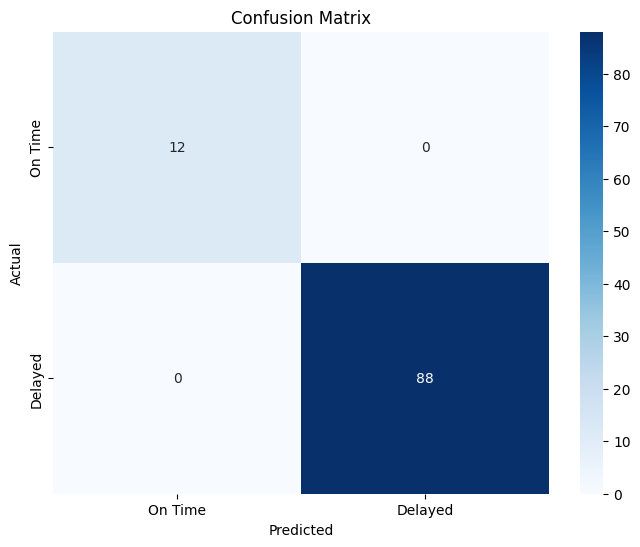


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        88

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [27]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed']) # Corrected ytickables to yticklabels
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

Step 8: Heatmap of Feature Correlations

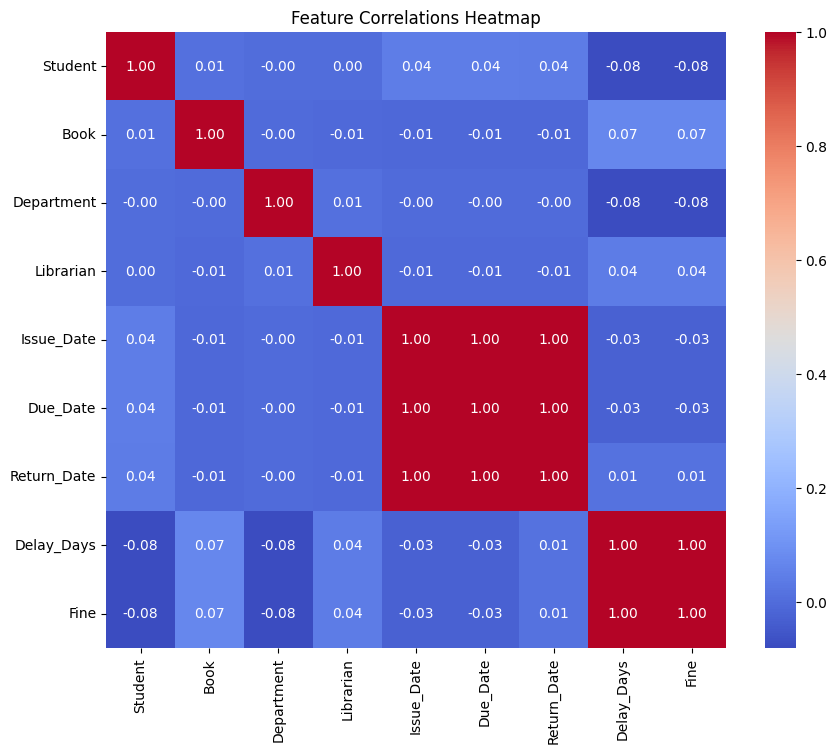

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['Slip_Id']).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlations Heatmap")
plt.show()

Step 9: Feature Importance


/tmp/ipython-input-3198483856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')


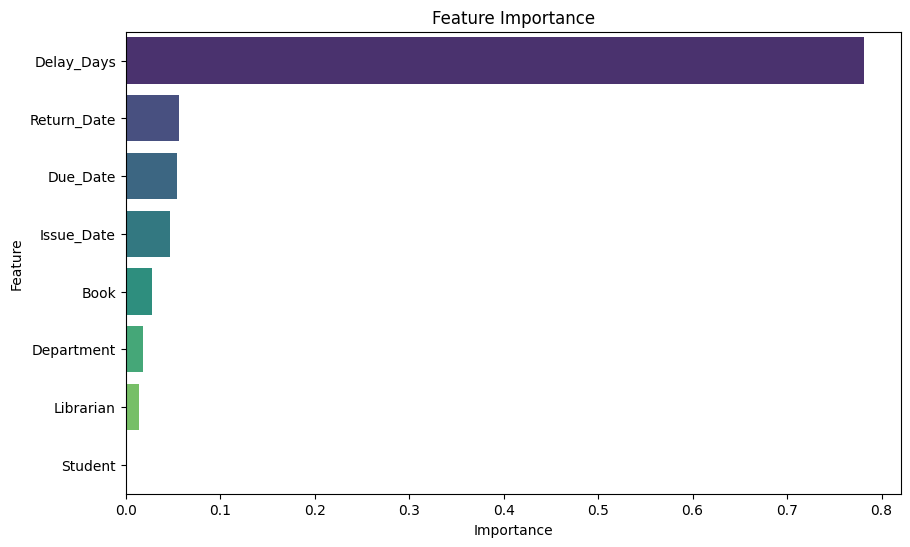

In [29]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()

Step 3: Loading DataSet (either uploaded by user or use the generated one)

In [30]:
from google.colab import files
import io
import pandas as pd

print("Please upload your own dataset or press cancel to use generated one")
uploaded = files.upload()
if uploaded:
  for filename in uploaded.keys():
    df = pd.read_csv(io.BytesIO(uploaded[filename]))
else:
  print("No file uploaded, using generated DataSet:")
  # Read the generated CSV directly from the file system
  df = pd.read_csv('library_slip_tracker.csv')

display(df.head())

Please upload your own dataset or press cancel to use generated one


No file uploaded, using generated DataSet:


,Slip_Id,Student,Book,Department,Librarian,Issue_Date,Due_Date,Return_Date,Delay_Days,Fine
0,SLIP00001,Aman Verma,Digital Circutis,Electronics,Mrs. Batra,2025-04-01,2025-04-15,2025-04-29,14,14
1,SLIP00002,r,Database Systems,AI,Mrs. Kapoor,2025-08-31,2025-09-14,2025-09-17,3,3
2,SLIP00003,r,Introduction to ML,CS,Mrs. Kapoor,2025-08-24,2025-09-07,2025-09-18,11,11
3,SLIP00004,r,Linear Algebra,Web Dev,Ms. Sheikh,2025-12-09,2025-12-23,2025-12-24,1,1
4,SLIP00005,r,Linear Algebra,Web Dev,Mrs. Batra,2025-10-17,2025-10-31,2025-11-01,1,1


from matplotlib import pyplot as plt
_df_0['Delay_Days'].plot(kind='hist', bins=20, title='Delay_Days')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Fine'].plot(kind='hist', bins=20, title='Fine')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Slip_Id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Student').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Book').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Department').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Delay_Days', y='Fine', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Issue_Date']
  ys = series['Delay_Days']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Issue_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Slip_Id')):
  _plot_series(series, series_name, i)
  fig.legend(title='Slip_Id', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Issue_Date')
_ = plt.ylabel('Delay_Days')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Issue_Date']
  ys = series['Delay_Days']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Issue_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Student')):
  _plot_series(series, series_name, i)
  fig.legend(title='Student', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Issue_Date')
_ = plt.ylabel('Delay_Days')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Issue_Date']
  ys = series['Delay_Days']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Issue_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Book')):
  _plot_series(series, series_name, i)
  fig.legend(title='Book', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Issue_Date')
_ = plt.ylabel('Delay_Days')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Issue_Date']
  ys = series['Delay_Days']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Issue_Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Department')):
  _plot_series(series, series_name, i)
  fig.legend(title='Department', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Issue_Date')
_ = plt.ylabel('Delay_Days')

from matplotlib import pyplot as plt
_df_11['Delay_Days'].plot(kind='line', figsize=(8, 4), title='Delay_Days')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['Fine'].plot(kind='line', figsize=(8, 4), title='Fine')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Student'].value_counts()
    for x_label, grp in _df_13.groupby('Slip_Id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Slip_Id')
_ = plt.ylabel('Student')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Book'].value_counts()
    for x_label, grp in _df_14.groupby('Student')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Student')
_ = plt.ylabel('Book')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Department'].value_counts()
    for x_label, grp in _df_15.groupby('Book')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Book')
_ = plt.ylabel('Department')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Librarian'].value_counts()
    for x_label, grp in _df_16.groupby('Department')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Department')
_ = plt.ylabel('Librarian')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Slip_Id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='Delay_Days', y='Slip_Id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Student'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='Delay_Days', y='Student', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Book'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='Delay_Days', y='Book', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Department'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='Delay_Days', y='Department', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Step 4: Preprocessing the Data

In [31]:
print("\n Data Preprocessing")

#Encode categorical columns
label_encoders = {}
categorical_cols = ['Student','Book','Department','Librarian']
for col in categorical_cols:
  label_encoders[col] = LabelEncoder()
  df[col] = label_encoders[col].fit_transform(df[col])

#Convert dates to numeric (days since earliest date)
date_cols = ['Issue_Date','Due_Date','Return_Date']
for col in date_cols:
  df[col] = pd.to_datetime(df[col])
  df[col] = (df[col] - df[col].min()).dt.days

#Feature and Target
X = df.drop(columns=['Slip_Id','Fine']) #Drop slip ID and fine from features
Y = (df['Delay_Days']>0).astype(int) #Target: 1 if returned late, otherwise 0

#Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

display(X_scaled)
display(Y)


 Data Preprocessing


array([[-2.23383079e+01, -2.59249449e-01,  4.07309919e-03, ...,
        -9.34328034e-01, -8.58680262e-01,  1.80325285e+00],
       [ 4.47661481e-02, -5.79310497e-01, -1.35362663e+00, ...,
         4.88012536e-01,  4.60868934e-01, -6.82434035e-01],
       [ 4.47661481e-02,  3.80872647e-01, -6.74776765e-01, ...,
         4.22510009e-01,  4.70227439e-01,  1.12533824e+00],
       ...,
       [ 4.47661481e-02,  6.08115991e-02, -6.74776765e-01, ...,
         8.52955182e-01,  7.88416607e-01, -1.36034864e+00],
       [ 4.47661481e-02,  1.66111684e+00, -6.74776765e-01, ...,
        -3.91592817e-01, -3.62679500e-01,  6.73395173e-01],
       [ 4.47661481e-02,  7.00933695e-01, -1.35362663e+00, ...,
        -1.39284572e+00, -1.31724700e+00,  1.80325285e+00]])

,Delay_Days
0,1
1,1
2,1
3,1
4,1
...,...
495,1
496,1
497,0
498,1


Step 5: Train-Test Split

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[ 0.04476615  0.38087265  0.0040731  ...  1.53605296  1.50902149
  -0.68243403]
 [ 0.04476615  1.34105579 -0.67477677 ... -0.70039044 -0.68086867
   0.44742364]
 [ 0.04476615 -0.89937154  0.68292296 ...  0.02013735 -0.03513183
  -1.36034864]
 ...
 [ 0.04476615 -1.21943259  1.36177283 ...  1.33018787  1.27505886
  -1.36034864]
 [ 0.04476615 -0.5793105  -1.35362663 ...  0.31021996  0.32984987
   0.44742364]
 [ 0.04476615  0.70093369  1.36177283 ...  0.44122502  0.46086893
   0.44742364]]
249    1
433    1
19     0
322    1
332    1
      ..
106    1
270    1
348    0
435    1
102    1
Name: Delay_Days, Length: 400, dtype: int64
[[ 4.47661481e-02 -5.79310497e-01  6.82922964e-01 -7.37035829e-01
   1.05882026e+00  1.05882026e+00  1.05981325e+00 -4.51943069e-03]
 [ 4.47661481e-02  1.66111684e+00 -1.35362663e+00  6.53597811e-01
  -2.32515253e-01 -2.32515253e-01 -2.03584916e-01  6.73395173e-01]
 [ 4.47661481e-02 -2.59249449e-01 -1.35362663e+00  6.53597811e-01
   2.01373481e-02  2.01373481e-02

Step 6: Model Training

In [37]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train,Y_train)

print(model)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Logistic Regression
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, Y_train)
y_pred_logreg = logreg.predict(X_test)
print("\nLogistic Regression Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(Y_test, y_pred_logreg))

# Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, Y_train)
y_pred_tree = tree.predict(X_test)
print("\nDecision Tree Classifier Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_tree))
print("Classification Report:\n", classification_report(Y_test, y_pred_tree))

# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train, Y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine (SVM) Results:")
print("Accuracy:", accuracy_score(Y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_svm))
print("Classification Report:\n", classification_report(Y_test, y_pred_svm))

# Accuracy for RandomForestClassifier (already trained as 'model')
y_pred_rf = model.predict(X_test)
acc_rf = accuracy_score(Y_test, y_pred_rf) * 100

# Accuracy for Logistic Regression
acc_logreg = accuracy_score(Y_test, y_pred_logreg) * 100

# Accuracy for Decision Tree Classifier
acc_tree = accuracy_score(Y_test, y_pred_tree) * 100

# Accuracy for SVM
acc_svm = accuracy_score(Y_test, y_pred_svm) * 100

print(f"Random Forest Classifier Accuracy: {acc_rf:.2f}%")
print(f"Logistic Regression Accuracy: {acc_logreg:.2f}%")
print(f"Decision Tree Classifier Accuracy: {acc_tree:.2f}%")
print(f"Support Vector Machine (SVM) Accuracy: {acc_svm:.2f}%")




RandomForestClassifier(random_state=42)

Logistic Regression Results:
Accuracy: 1.0
Confusion Matrix:
 [[12  0]
 [ 0 88]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        88

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Decision Tree Classifier Results:
Accuracy: 1.0
Confusion Matrix:
 [[12  0]
 [ 0 88]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        88

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100


Support Vector Machine (SVM) Results:
Accuracy: 0.91
Confusion Matrix:
 [[ 4  8]
 [ 1 87

Step 7: Predictions and Evaluation


Accuracy: 1.0

Confusion Matrix:


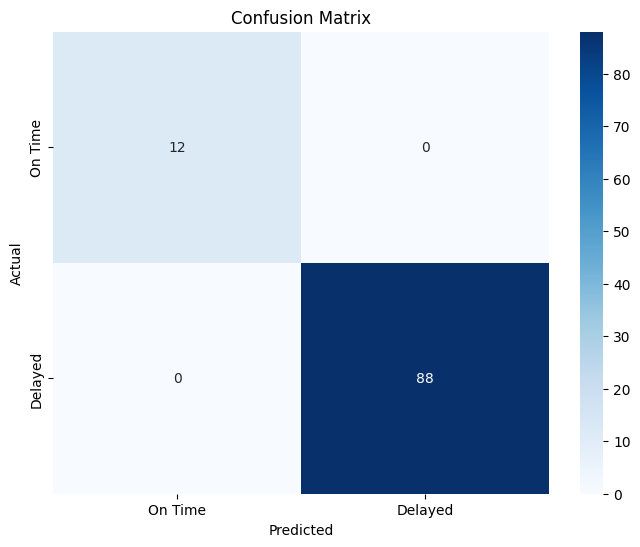


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        88

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [34]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
conf_matrix = confusion_matrix(Y_test,y_pred)
class_report = classification_report(Y_test,y_pred)

print(f"\nAccuracy: {accuracy}")
print("\nConfusion Matrix:")

#Confusion Matrix
cm = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['On Time', 'Delayed'],
            yticklabels=['On Time', 'Delayed'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:")
print(class_report)

Step 8: Heatmap of Feature Correlations

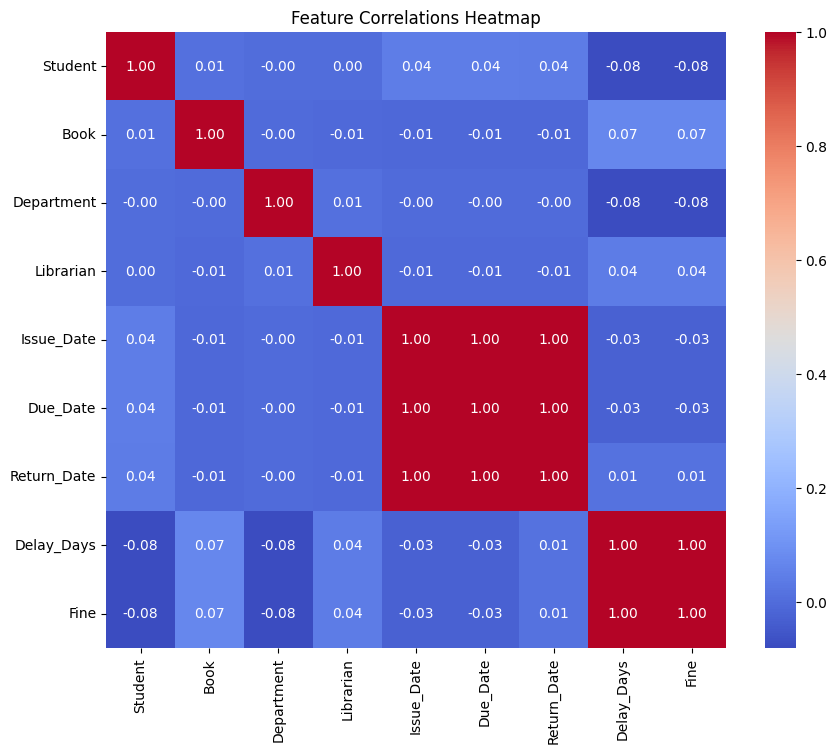

In [35]:
plt.figure(figsize=(10,8))
sns.heatmap(df.drop(columns=['Slip_Id']).corr(),annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Correlations Heatmap")
plt.show()

Step 9: Feature Importance

/tmp/ipython-input-3198483856.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')


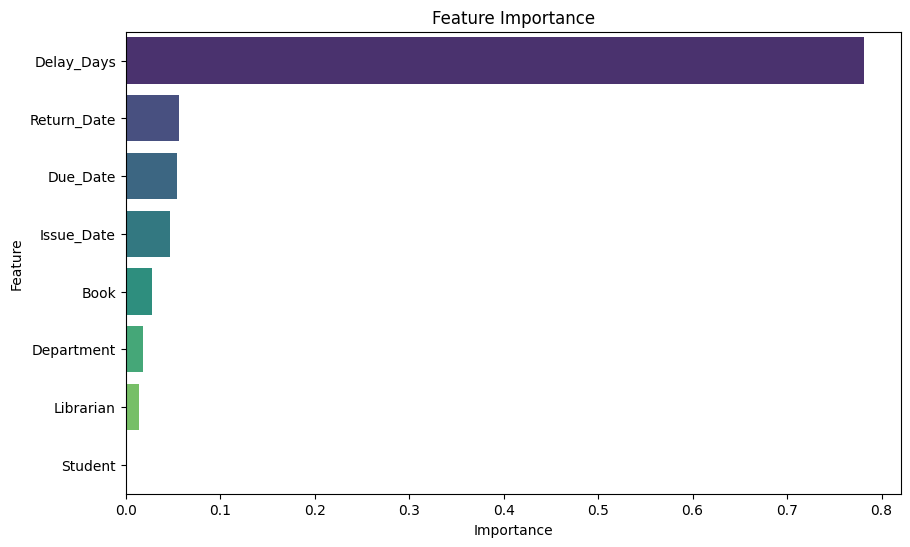

In [36]:
importances = model.feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x='Importance',y='Feature',data=feat_df, palette='viridis')
plt.title("Feature Importance")
plt.show()